# Softmax Regression

## Classification Problem

To get our feet wet, let us start off with
a simple image classification problem.
Here, each input consists of a $2\times2$ grayscale image.
We can represent each pixel value with a single scalar,
giving us four features $x_1, x_2, x_3, x_4$.
Further, let us assume that each image belongs to one
among the categories "cat", "giraffe", and "dog".


Next, we have to choose how to represent the labels.*one-hot encoding*.
A one-hot encoding is a vector with as many components as we have categories.
The component corresponding to particular instance's category is set to 1
and all other components are set to 0.
In our case, a label $y$ would be a three-dimensional vector,
with $(1, 0, 0)$ corresponding to "cat", $(0, 1, 0)$ to "chicken",
and $(0, 0, 1)$ to "dog":

$$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

![grayscale](./img/pic1.svg)


## Network Architecture

We have 4 features and 3 possible output categories,
we will need 12 scalars to represent the weights ($w$ with subscripts),
and 3 scalars to represent the biases ($b$ with subscripts).
We compute these three *logits*, $o_1, o_2$, and $o_3$, for each input:

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

We can depict this calculation with the neural network diagram.
Softmax regression is a single-fully-connected layer.layer neural network.

![Softmax regression is a single-layer neural network.](./img/softmaxreg.svg)

To express the model more compactly, we can use linear algebra notation.
In vector form, we arrive at
$\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$,
a form better suited both for mathematics, and for writing code.
Note that we have gathered all of our weights into a $3 \times 4$ matrix
and that for features of a given data example $\mathbf{x}$,
our outputs are given by a matrix-vector product of our weights by our input features
plus our biases $\mathbf{b}$.

## Softmax Operation

The main approach that we are going to take here
is to interpret the outputs of our model as *probabilities*.
Then, to generate predictions, we will set a threshold,
for example, choosing the label with the *maximum predicted probabilities*.

Put formally, we would like any output $\hat{y}_j$
to be interpreted as the probability
that a given item belongs to class $j$.
Then we can choose the class with the largest output value
as our prediction $\operatorname*{argmax}_j y_j$.

For example:
> if $\hat{y}_1$, $\hat{y}_2$, and $\hat{y}_3$
are 0.1, 0.8, and 0.1, respectively,
then we predict category 2, which (in our example) represents "giraffe".

You might be tempted to suggest that we interpret
the logits $o$ directly as our outputs of interest.
However, there are some problems with directly
interpreting the output of the linear layer as a probability.
Problems:
1. Nothing constrains these numbers to sum to 1.
2. Depending on the inputs, they can take negative values.

To interpret our outputs as probabilities,
we must guarantee that (even on new data): 
*they will be nonnegative and sum up to 1*.


The *softmax function*, invented in 1959 by the social scientist
R. Duncan Luce, does precisely this.
To transform our logits such that they become nonnegative and sum to 1,
while requiring that the model remains differentiable:
1. we first exponentiate each logit (ensuring non-negativity)
2. then divide by their sum (ensuring that they sum to 1):

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{where}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}. $$

where $\hat{\mathbf{y}}$ is a vector of length k, same as length of logits vector.

- $\hat{y}_1 + \hat{y}_2 + \hat{y}_3 = 1$
- with $0 \leq \hat{y}_j \leq 1$ for all $j$.

Thus, $\hat{\mathbf{y}}$ is a proper probability distribution
whose element values can be interpreted accordingly.
During prediction we can still pick out the most likely class by

$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$



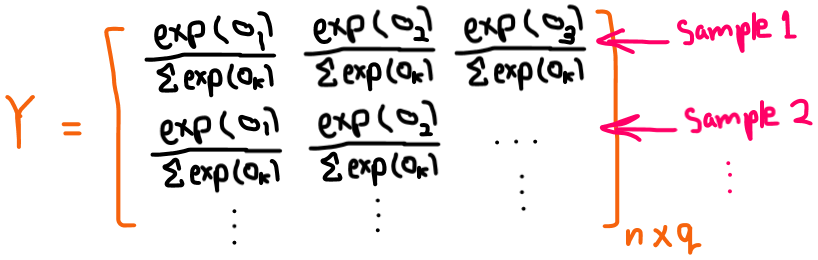## Vectorization for Minibatches


Assume that we are given a minibatch $\mathbf{X}$ of examples
with feature dimensionality (number of inputs) $d$ and batch size $n$.
Moreover, assume that we have $q$ categories in the output.
Then the minibatch features $\mathbf{X}$ are in $\mathbb{R}^{n \times d}$,
weights $\mathbf{W} \in \mathbb{R}^{d \times q}$,
and the bias satisfies $\mathbf{b} \in \mathbb{R}^{1\times q}$.

$$ \begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned} $$
![Softmax regression is a single-layer neural network.](./img/pic3.png)
![Softmax regression is a single-layer neural network.](./img/pic4.png)

Since each row in $\mathbf{X}$ represents a data example,
the softmax operation itself can be computed *rowwise*:
for each row of $\mathbf{O}$, exponentiate all entries and then normalize them by the sum.
Triggering broadcasting during the summation $\mathbf{X} \mathbf{W} + \mathbf{b}$ ,
both the minibatch logits $\mathbf{O}$ and output probabilities $\hat{\mathbf{Y}}$
are $n \times q$ matrices.

![Softmax regression is a single-layer neural network.](./img/full.jpeg)

## Loss Function

Next, we need a loss function to measure
the quality of our predicted probabilities.
A loss function is used to help the model determine how "wrong" it is and, based on that "wrongness," improve itself. It's a measure of error. Our goal throughout training is to minimize this error/loss.

![Softmax regression is a single-layer neural network.](./img/dist.jpeg)

### Cross Entropy Loss

$$
Cost= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

where for any pair of label $\mathbf{y}$ and model prediction $\hat{\mathbf{y}}$ over $q$ classes,
the loss function $l$ is

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

![Softmax regression is a single-layer neural network.](./img/log.png)


Since $\mathbf{y}$ is a one-hot vector of length $q$,
the sum over all its coordinates $j$ vanishes for all but one term **True Class**.

Since all $\hat{y}_j$ are predicted probabilities,
their logarithm is never larger than $0$.
Consequently, the loss function cannot be minimized any further
if we correctly predict the actual label with *certainty*,
i.e., if the predicted probability $P(\mathbf{y} \mid \mathbf{x}) = 1$ for the actual label $\mathbf{y}$.
Note that this is often impossible.
For example, there might be label noise in the dataset
(some examples may be mislabeled).
It may also not be possible when the input features
are not sufficiently informative
to classify every example perfectly.

### Softmax and Derivatives

Plugging softmax into the definition of the loss we obtain:

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

Consider the derivative with respect to any logit $o_j$. We get

$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

In other words, the derivative is the difference
between the probability assigned by our model,
as expressed by the softmax operation,
and what actually happened, as expressed by elements in the one-hot label vector.
In this sense, it is very similar to what we saw in regression,
where the gradient was the difference
between the observation $y$ and estimate $\hat{y}$.

## Summary

* The softmax operation takes a vector and maps it into probabilities.
* Softmax regression applies to classification problems. It uses the probability distribution of the output class in the softmax operation.